### Import Libraries

In [44]:
# Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
pd.options.display.float_format = '{:.0f}'.format

> **Note**: temperature change is with respect to a baseline climatology, corresponding to the period 1951–1980 (as said within [the documentation](https://www.fao.org/faostat/en/#data/ET)).

## I. Load & Explore the Data

In [45]:
# Import the data
temp = pd.read_csv(r"C:\Users\franc\OneDrive\Escritorio\HPChallenge\Challenge 1\temperature_change_data_11-29-2021.csv")
temp.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [46]:
temp

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-1,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,1,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,2,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-1,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67620,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2016,2016,°C,1,Fc,Calculated data
67621,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2017,2017,°C,0,Fc,Calculated data
67622,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2018,2018,°C,1,Fc,Calculated data
67623,ET,Temperature change,ZWE,Zimbabwe,7271,Temperature change,7020,Meteorological year,2019,2019,°C,1,Fc,Calculated data


In [47]:
temp.describe()

,Element Code,Months Code,Year Code,Year,Value
count,67625,67625,67625,67625,65331
mean,7271,7018,1991,1991,0
std,0,1,17,17,1
min,7271,7016,1961,1961,-6
25%,7271,7017,1976,1976,-0
50%,7271,7018,1992,1992,0
75%,7271,7019,2006,2006,1
max,7271,7020,2020,2020,8


In [48]:
temp['Area'].value_counts()

Area
Afghanistan              300
Norfolk Island           300
Namibia                  300
Nauru                    300
Nepal                    300
                        ... 
Montenegro                75
Serbia                    75
Serbia and Montenegro     70
Sudan                     50
South Sudan               50
Name: count, Length: 247, dtype: int64

## II. Prepare the Data

In [49]:
# Countries to keep
areas_to_keep = ["China", "Germany", "Japan", "United States of America"]

# Filter the data
evolution = temp[(temp["Flag Description"] != "Data Not Available") & 
                 (temp["Months"] == "Meteorological year") & 
                 (temp["Area"].isin(areas_to_keep))].reset_index(drop=True)

# Rename some Areas
evolution["Area"] = evolution["Area"].replace(to_replace=["United States of America"],
                                             value=["United States"])

# Group by Area and Year
evolution = evolution.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Look into the dataframe
evolution.head()

,Area,Year,Value
0,China,1961,0
1,China,1962,-0
2,China,1963,0
3,China,1964,-0
4,China,1965,0


## III. Create the Lineplot

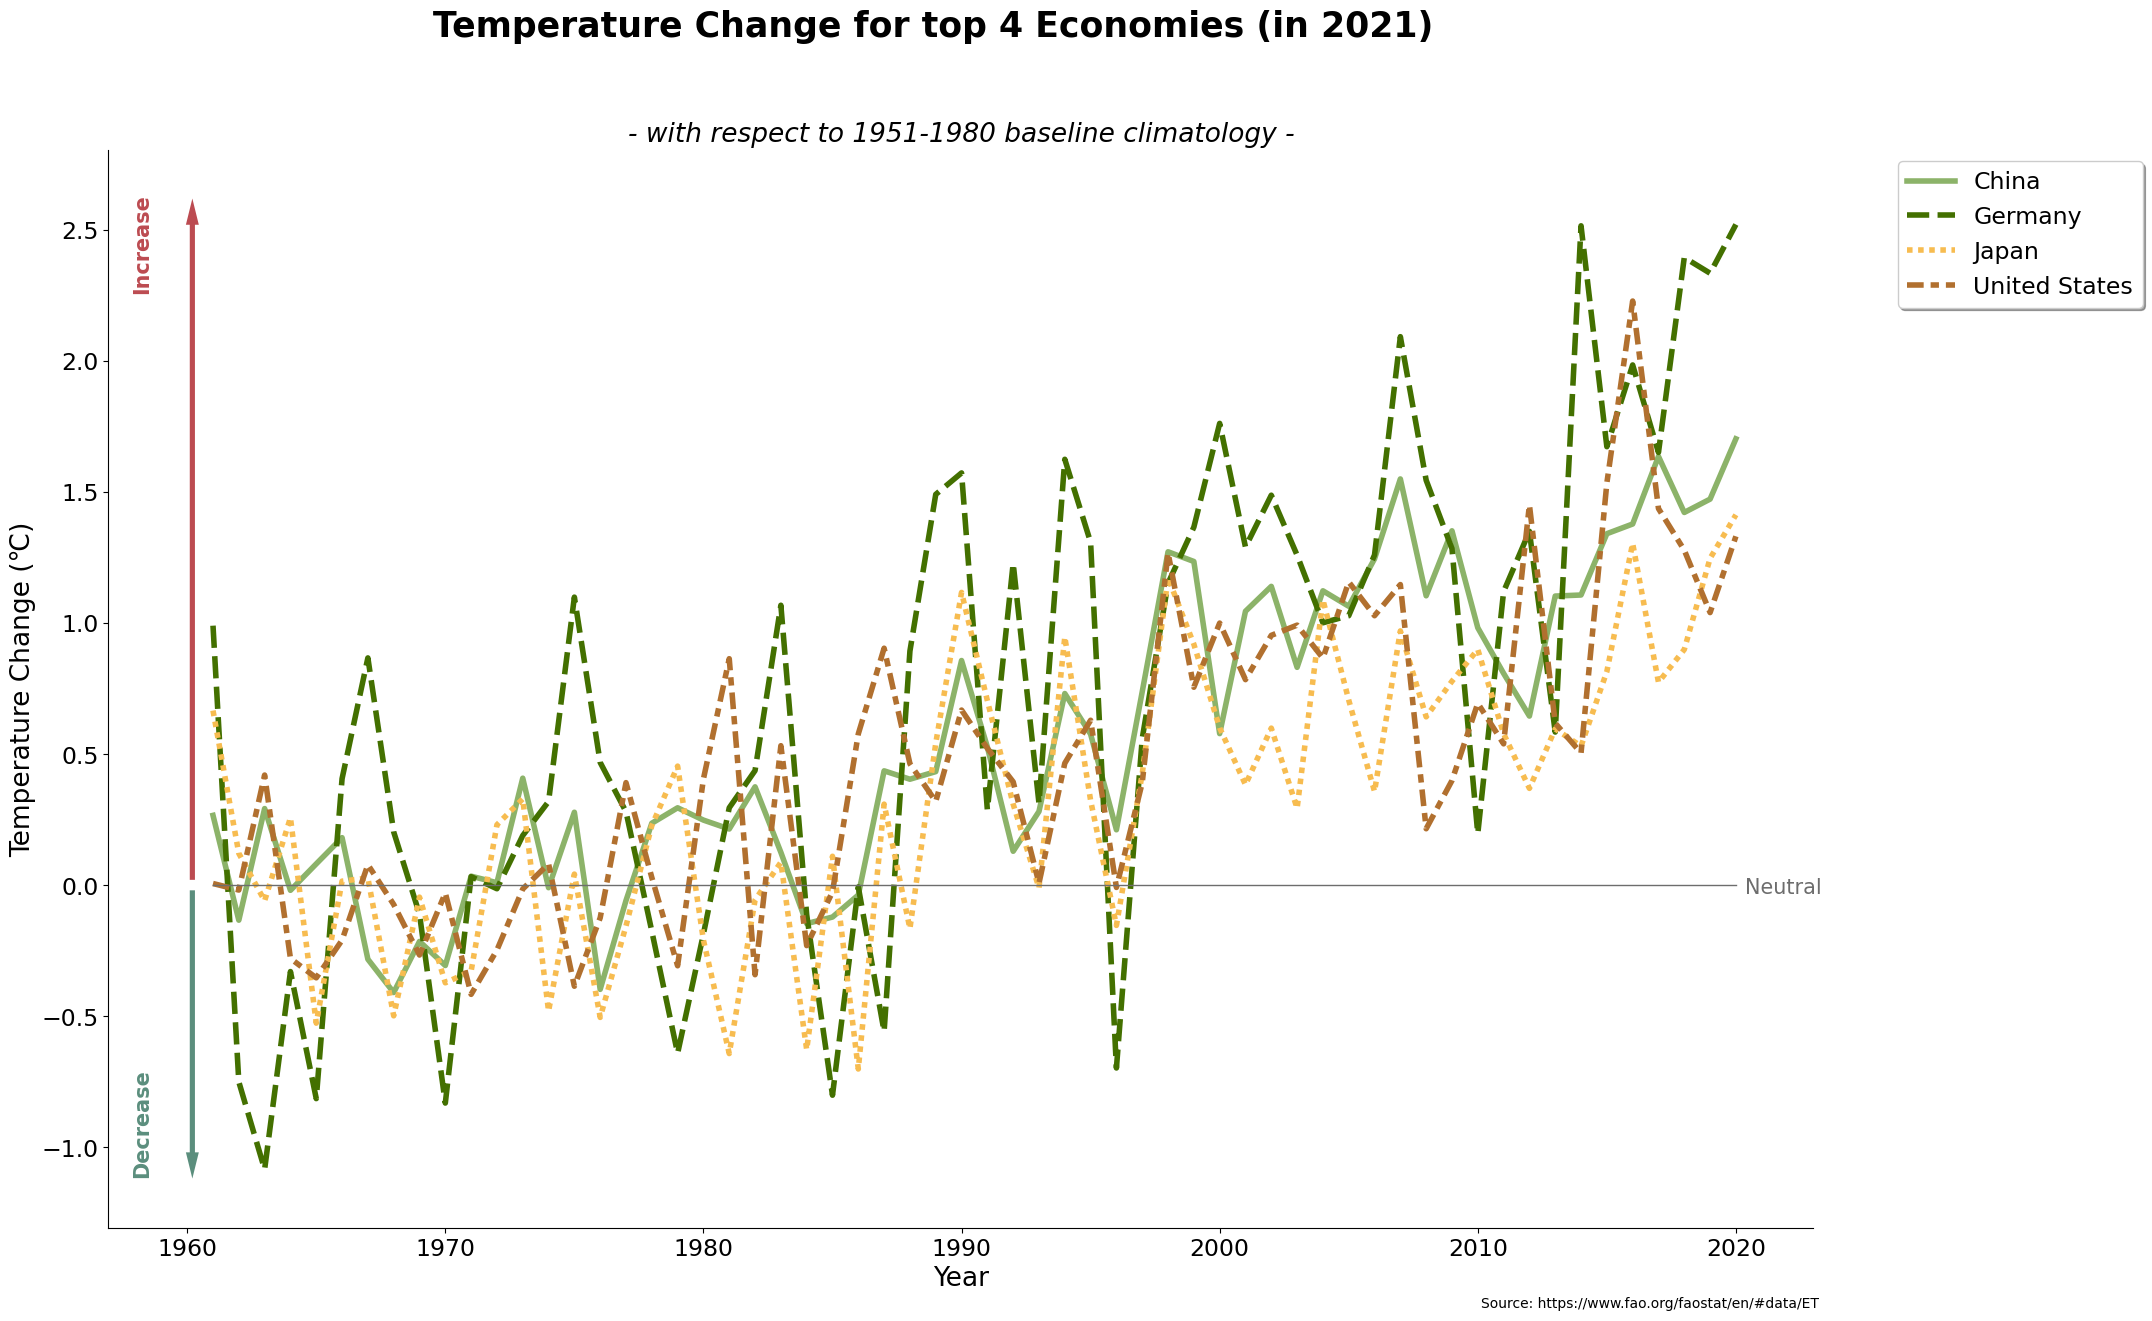

In [50]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (℃)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Add arrows for better visualization
plt.arrow(x=1960.2, y=0.02, dx=0, dy=2.5, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#BC4B51', edgecolor='none')
plt.arrow(x=1960.2, y=-0.02, dx=0, dy=-1, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#5B8E7D', edgecolor='none')
plt.plot([1961, 2020], [0.0, 0.0], lw=1, color="#6D6D6D")

# Add text helpers
plt.text(0.014, 0.87, 'Increase', fontsize=15, color='#BC4B51', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.014, 0.05, 'Decrease', fontsize=15, color='#5B8E7D', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.96, 0.31, 'Neutral', fontsize=15, color='#6D6D6D',
         rotation="horizontal", transform=line.transAxes)

# Add source of data
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');